In [2]:
import os
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from pathlib import Path
from tqdm.notebook import tqdm 

In [3]:

data_path = Path("/Users/aksharpatel/Desktop/medical imagine classifier/Medical-Imaging-Classifier/data")

raw_data_path = data_path / 'raw'
metadata_data_path = data_path / 'metadata'

raw_image_001_path = raw_data_path / 'images_001'


In [6]:
image_count = len(list(raw_image_001_path.iterdir()))

print(f'Images in image_001: {image_count}')

Images in image_001: 4999


In [8]:
# Check random sample (e.g., 10% of images) instead of all images
import random

image_files = list(raw_image_001_path.iterdir())
sample_size = len(image_files) // 10  # 10% of images
sampled_files = random.sample(image_files, sample_size)

dimensions = []
for img_path in sampled_files:
    with Image.open(img_path) as img:  # 'with' automatically closes the image
        dimensions.append(img.size)

In [16]:
import pandas as pd

# Convert to DataFrame
dimensions_df = pd.DataFrame(dimensions, columns=['width', 'height'])
dimensions_df.describe()

,width,height
count,499.0,499.0
mean,1024.0,1024.0
std,0.0,0.0
min,1024.0,1024.0
25%,1024.0,1024.0
50%,1024.0,1024.0
75%,1024.0,1024.0
max,1024.0,1024.0


In [27]:
metadata_df = pd.read_csv(metadata_data_path / 'Data_Entry_2017_v2020.csv')

last_file = sorted(list(raw_image_001_path.iterdir()))[-1]
last_file_name = last_file.stem

filtered_metadata = metadata_df[metadata_df['Image Index'] <= last_file_name]

print(f"Last available image: {last_file_name}")
print(f"Total images in filtered metadata: {len(filtered_metadata)}")

pneumonia_distribution = filtered_metadata['Finding Labels'].str.contains('Pneumonia', case=False, na=False)

pneumonia_counts = pneumonia_distribution.value_counts()

print(f'Pneumonia counts: {pneumonia_counts}')



Last available image: 00001335_006
Total images in filtered metadata: 4998
Pneumonia counts: Finding Labels
False    4933
True       65
Name: count, dtype: int64


In [30]:
finding_to_images = {}
finding = 'Pneumonia'
finding_to_images[finding] = filtered_metadata[metadata_df['Finding Labels'].str.contains(finding, na=False)]['Image Index'].tolist()
sampled_indices = random.sample(finding_to_images[finding], min(5, len(finding_to_images[finding])))

print(finding_to_images)

{'Pneumonia': ['00000013_010.png', '00000032_012.png', '00000056_000.png', '00000061_012.png', '00000061_015.png', '00000144_001.png', '00000150_002.png', '00000165_001.png', '00000193_019.png', '00000211_013.png', '00000211_018.png', '00000218_000.png', '00000218_001.png', '00000261_002.png', '00000261_007.png', '00000310_001.png', '00000398_002.png', '00000415_001.png', '00000459_041.png', '00000468_029.png', '00000468_040.png', '00000499_008.png', '00000506_013.png', '00000506_015.png', '00000506_016.png', '00000573_008.png', '00000583_034.png', '00000583_045.png', '00000591_004.png', '00000688_002.png', '00000710_003.png', '00000766_005.png', '00000766_006.png', '00000766_007.png', '00000766_010.png', '00000766_017.png', '00000766_018.png', '00000772_002.png', '00000773_001.png', '00000798_025.png', '00000798_039.png', '00000831_001.png', '00000877_030.png', '00000893_000.png', '00000910_001.png', '00000915_005.png', '00000963_007.png', '00001018_005.png', '00001021_000.png', '0000

/var/folders/9n/3myhfcp93c9_9vv_7n4swndm0000gn/T/ipykernel_65272/44615275.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  finding_to_images[finding] = filtered_metadata[metadata_df['Finding Labels'].str.contains(finding, na=False)]['Image Index'].tolist()


In [34]:
from PIL import Image
import matplotlib.pyplot as plt

# Load and display sampled images for the finding
for idx in sampled_indices:
    img_path = raw_image_001_path / f"{idx}"  # Add file extension if needed (.png)
    img = Image.open(img_path)
    img.show()
    

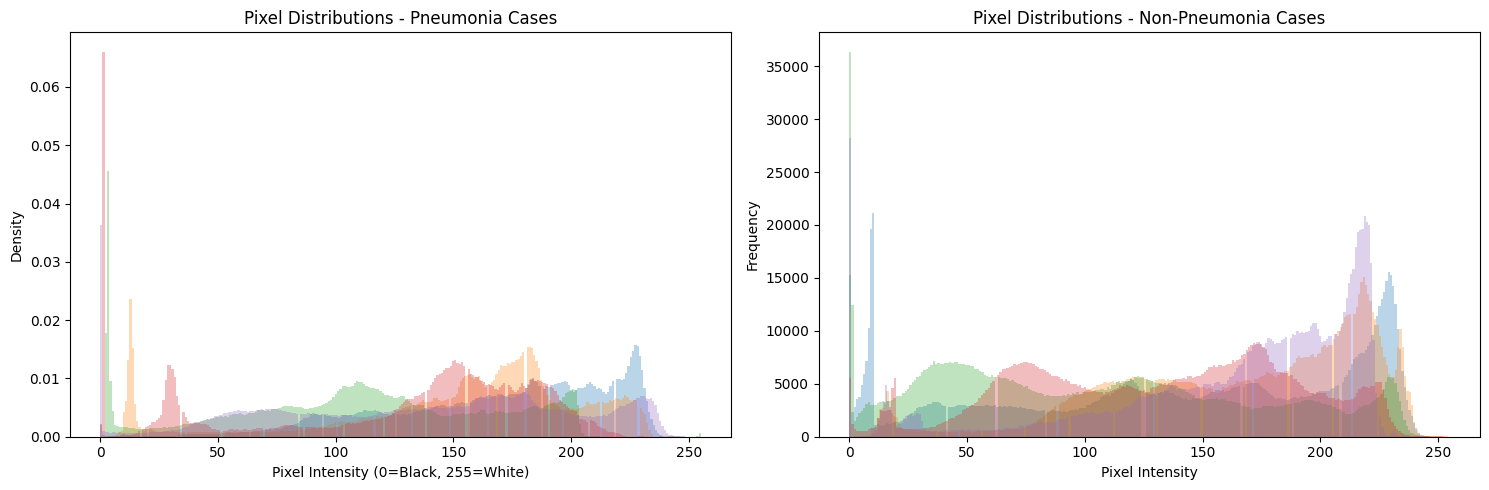

In [39]:
pneumonia_cases = filtered_metadata[filtered_metadata['Finding Labels'].str.contains('Pneumonia', na=False)]['Image Index'].tolist()
non_pneumonia_cases = filtered_metadata[~filtered_metadata['Finding Labels'].str.contains('Pneumonia', na=False)]['Image Index'].tolist()

# Sample 5 from each
pneumonia_sample = random.sample(pneumonia_cases, 5)
non_pneumonia_sample = random.sample(non_pneumonia_cases, 5)

# Create plots
plt.figure(figsize=(15, 5))

# Plot for pneumonia cases
plt.subplot(1, 2, 1)
for idx in pneumonia_sample:
    img_path = raw_image_001_path / f"{idx}"
    img = np.array(Image.open(img_path))
    plt.hist(img.ravel(), bins=256, density=True, alpha=0.3, label=f'Image {idx}')  # Added density=True
plt.title('Pixel Distributions - Pneumonia Cases')
plt.xlabel('Pixel Intensity (0=Black, 255=White)')
plt.ylabel('Density')

# Plot for non-pneumonia cases
plt.subplot(1, 2, 2)
for idx in non_pneumonia_sample:
    img_path = raw_image_001_path / f"{idx}"
    img = np.array(Image.open(img_path))
    plt.hist(img.ravel(), bins=256, alpha=0.3, label=f'Image {idx}')
plt.title('Pixel Distributions - Non-Pneumonia Cases')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()